![UVic logo](https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1406151713/wptak6xuezyh36b1hbty.png)

# **ECE 471/536 Spring 2023: Computer Vision**
## Assignment 4: Convolutional Neural Networks and Logistic Regression
### Due date: TBD


> Student: Bhavanvir Rai, V00938954
---

## **1. Instructions:** follow the intructions provided on a sequential manner. 
### 1.0 **Identification** 
Please enter your name and V number on the text code above.

### 1.1 **Submission package**
Your final submission package must be submitted using the [BrightSpace](https://https://bright.uvic.ca/d2l/home)  platform. You will find this assignment's specific page under **Course Tools > Assignments**. Your submission package consists of a *.zip* file containing:

1.   *.ipynb* file: your modified version of this Google Colab template. Place your complete assignment solution/information in this version.  
2.   *.pdf* file: a document containing a writeup with the answers to mathematical questions. 

### 1.2 **Coding considerations**
* In previous years we asked students to complete assignments offline by installing either MATLAB or a Python environment in their computers. In order to standardize the submissions and guarantee that everyone has access to the same Python environment, all assignments are going to be described (by us) and completed (by you) using the same Google Colab reference template script.
* Google Colab offers a Python environment that can be accessed in your browser and executed using Google Cloud, so no local installation is necessary. It makes the setting-up process significantly easier! Please read [this quick tutorial](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb) notebook on Google Colab/Python.

### 1.3 **Creating your Google Colab submission file**

* Modify this template with your solutions to the assignment. You will find "**TO-DO**" indicators throughout the assingment highlighting portions of the code you are asked to complete. 
* Only edit the provided templates in the bounds of the START TODO and END TODO flags.
* Colab notebooks are divided into individual cells. You can execute the code inside of a given cell by pressing **CTRL+ENTER**, or that of all cells by pressing **CTRL+F9**. Variables must be "executed" in a cell before being used by subsequent ones (the same goes for libraries imported). Note that some cells of this assignment contain flags that must by changed (and executed) before you move forward.
* If you completed the whole assignment, make sure that simply pressing "**CTRL+F9**" executes all cells correctly. **This is going to be the first marking step we will execute when evaluating your submission**.  

### 1.4 **Use of open source code**

* The use of small segments of freely-available code is permitted. However, it is **extremely important** that you indicate in your in-code comments where these are used, as well as their sources. Failure to do so can be considered plagiarism, which is a serious offence. Learn more about detection mechanisms and consequences of plagiarism at UVic [here](https://www.uvic.ca/library/research/citation/plagiarism/). Note that the programming assignments are designed so that most of their content should be created by you.     
* You can never include too many of these only too few. 
* A number of functions/algorithms are already implemented by libraries we will use (e.g., [OpenCV](https://opencv.org/), [scikit-learn](https://scikit-learn.org/stable/)), however you should not use them unless otherwise instructed to do so. Mannualy coding some of these function is an important part of the learning process.  


In [1]:
# ~~~~~~~START TODO~~~~~~~~~
READ_THE_INSTRUCTIONS_FLAG = True
# ~~~~~~~~END TODO~~~~~~~~~~

# **2. Theoretical**

## 2.1 Backpropogation (35 marks)

Backpropogation is the method in which we update the learnable parameters in a network.  We do this by applying the "chain rule" to the *local gradient* with the *upstream gradient* to get a new *downstream gradient*.  These gradients are defined using a *computational graph*, which converts a formula to a directed graph.  Unlike when doing the analytic gradient we do not need to know the final "form" of the network/loss function, we just need to know how to find the gradient of the local computational node. 


---


Below is a simple graph that consists of 2 learnable paramters, $W,x$ and is equivalent to the formula:

\begin{equation}
L = \sum \sigma(xW) 
\end{equation}
where L is a scalar output.



![](https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A4/q1.png)

**HINT:**  When calculating the gradients of the $\sum(X)$ function, recall when we discussed the Jaccobian matrix for the matrix multiplication function.  If we breakout the summation into it's parts it will look like: 
\begin{equation}
L = x_1 + x_2 + x_3 ... + x_n
\end{equation}
If we take the gradient $\frac{\partial{L}}{\partial{x_1}}$, what commonents in the equation above are affected by $x_1$?


---


**For full marks, show all your work.  Make sure you round all values to 4 decimal places**

1. How many classes does this network have (Hint think about the shape after the matrix multiplication)? (2 marks)


2.  Compute the forward pass for this network. (10 marks)


3.  Calculate local gradients for each node in the graph: (10 marks) 
$\frac{\partial{L}}{\partial{q}},\frac{\partial{q}}{\partial{p}},\frac{\partial{p}}{\partial{W}},\frac{\partial{p}}{\partial{x}}$


4.  Use the chain rule to compute the gradients of the inputs: $\frac{\partial{L}}{\partial{W}},\frac{\partial{L}}{\partial{x}}$ (13 marks)


## 2.2 Datasets (20 marks)

Deep neural networks and machine learning are *data-driven* approaches.  We must carefully consider our dataset, it's underline properties and distributions, and how it will affect the performance of our algorithms.


---


1.  You have selected a dataset and split it randomly into a test set and train set (20/80\% split with 10 classes).  My classifier performs 90\%+ on the training set, but only 10\% on test set.  What might be the problem? What is a possible solution? (10 marks)

2.   Give an example of an application where reducing False-Positive errors is more important than reducing False-Negative errors? Give an example of a system where reducing False-Negative errors is more important than reducing False-Positive errors?  Justify both your answers. (10 marks)


## 3.2 Convolutional and Pooling Layers (35)

The disadvantage of fully connected layers, is that we disregard (flatten) local spatial characteristics in an image.  Since convolution is a linear operation, which "reports" the response of a image to a kernel/filter, it is an idea replacement.  However, this increases the number of learnable parameters in our network as we replace our weight matrices $W_n$ with filters/kernels.  *Receptive fields* tell us that we don't need the "keep" all of the input tensor as we stack layers; we can essentially downsample without losing significant information.  This is done by using pooling layers and strided convolution.  The following questions cover convolution and pooling layers.

For the following questions, use this input tensor:

![](https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A4/input_tensor.png)


1.  The input tensor above is subjected to a MaxPool operation with a kernel of 2x2 with a stride of 2 (no padding).  Show the resulting output tensor. (5 marks)


2.  The input tensor above is subjected to a Average Pool operation with a kernel of 2x2 with a stride of 2 (no padding). Show the resulting output tensor. (5 marks)



3.  A convolutional layer has a kernel of size 6x3x5x5.  Can this kernel be used on the input tensor provided? (2 mark)


4. For a convolutional neural network with 10 x 10 input images, one convolutional layer with one 3 x 3 filter (one activation map, with padding=1), then one 2 x 2 max pooling layer (stride=2), and then one fully connected layers with three output units (for three-category
classification problems). How many weights (not including bias terms) are updated during training? (3 points)


For the following questions, us the simple convolutional layer with an input layer $X_{3x3x3}$ and a filter $w_{3x3x3}$, with a $bias = 1$. :
![](https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A4/conv.png)


5. Perform **valid** convolution by hand with a stride=1 using the values below, and bias.  You do not need to rotate the filters. (10 points).


6. Perform **same** convolution by hand with a stride=1 using the values below, and bias.  You do not need to rotate the filters. (10 points).   






# **3. Programming: introduction to Python, Colab and OpenCV**

### **3.1 Basic image operations**


---



---


In [2]:
#We need version 0.19.2 for SIFT 
!pip install -U scikit-image==
!pip install Pillow==9.0.0

from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from skimage import data, exposure
from google.colab import files
import sys
import cv2
import os
import numpy as np
import requests, tarfile, tqdm

print('-'*40)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-image== (from versions: 0.7.2, 0.8.0, 0.8.1, 0.8.2, 0.9.0, 0.9.1, 0.9.3, 0.10.0, 0.10.1, 0.11.2, 0.11.3, 0.12.0, 0.12.1, 0.12.2, 0.12.3, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.14.2, 0.14.3, 0.14.5, 0.15.0, 0.16.2, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.18.2, 0.18.3, 0.19.0rc0, 0.19.0, 0.19.1, 0.19.2, 0.19.3, 0.20.0.dev0, 0.20.0rc2, 0.20.0rc3, 0.20.0rc4, 0.20.0rc5, 0.20.0rc6, 0.20.0rc7, 0.20.0rc8, 0.20.0)
ERROR: No matching distribution found for scikit-image==
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


----------------------------------------
Python version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
OpenCV version: 4.7.0

Thank you for reading the instructions.
----------------------------------------


In [3]:
from IPython.utils.py3compat import decode
# Helper function provided to you (from the CIFAR website)
import pickle
def unpickle(file_name):                                       
    """unpickle function from CIFAR10 webpage"""               
    with open(file_name, 'rb') as fo:                          
        dict = pickle.load(fo, encoding='bytes')               
    return dict

def load_cifar_dataset(data_dir, keep_index=None, seed=0):
  # ~~~~~~~START TODO~~~~~~~~~
  # (15 points): Load the CIFAR-10 dataset
  # CIFAR-10 is a dataset consisting of ten classes; the label names are in a Python dictionary
  # stored in `batches.meta` in the data_dir.  It comes in 5 train batches `data_batch_[1-5]` and 
  # 1 `test_batch` binary files.
  # They are each pickled Python dictionaries that have two keys: data, and labels.  
  # Extract the required data/labels for each train/test split and return them, and class labels,
  # in the manner described below.
  #
  # You will filter the dataset to keep classes in the `keep_index` 
  #
  # Suggested functions: np.concatenate, np.transpose, np.reshape, unpickle (provided see above), np.stack, np.newaxis

  #NOTE: For further details on the data setup, visit the dataset website: https://www.cs.toronto.edu/~kriz/cifar.html

    # 1. Unpickle and extract the class labels (b'label_names') from 'batches.meta' 
    #      NOTE: You'll want to decode the binary strings to normal strings
    # 2. Unpickle the extracted file and concatenate the 5 batches 'data_batch_[1-5]' into a train data numpy array
    # 3. Unpickle the extracted file and convert 'test_batch' into a test data numpy array
    # 4. Remove any data/labels that are not in keep_index and create a new class labels array
    # 5. Concatenate the train/test labels into separate numpy arrays
    # 6. Turn data into (NxHxWxC) format, so that we can easily process it, where
    #     N=number of images, H=height, W=width, C=channels.
    # 7. Use the sklearn.utils.shuffle 'shuffle' function to shuffle your train data and train labels, make sure to seed the random_state
  
  # Source: https://github.com/snatch59/load-cifar-10/blob/master/load_cifar_10.py
  meta_file = os.path.join(data_dir, 'batches.meta')
  meta_data = unpickle(meta_file)
  label_names = [name.decode('utf-8') for name in meta_data[b'label_names']]

  train_data = []
  train_label = []
  for i in range(1, 6):
    file_name = os.path.join(data_dir, f'data_batch_{i}')
    data_batch = unpickle(file_name)
    train_data.append(data_batch[b'data'])
    train_label.append(data_batch[b'labels'])
  train_data = np.concatenate(train_data, axis=0)
  train_label = np.concatenate(train_label, axis=0)

  file_name = os.path.join(data_dir, 'test_batch')
  test_batch = unpickle(file_name)
  test_data = test_batch[b'data']
  test_label = np.array(test_batch[b'labels'])

  class_labels = []
  if keep_index is not None:
    train_mask = np.isin(train_label, keep_index)
    test_mask = np.isin(test_label, keep_index)
    train_data = train_data[train_mask]
    train_label = train_label[train_mask]
    test_data = test_data[test_mask]
    test_label = test_label[test_mask]
    class_labels = [label_names[i] for i in keep_index]

  train_label = np.array(train_label)
  test_label = np.array(test_label)

  train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
  test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

  train_data, train_label = shuffle(train_data, train_label, random_state=seed)
  # ~~~~~~~~END TODO~~~~~~~~~~
  
  return train_data, train_label, test_data, test_label, class_labels


data_url    = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
data_dir    = "/content/cifar-10-batches-py" 
keep_index  = [0,3,6] #airplane, cat, frog
if not os.path.exists(data_dir): 
  tarball = requests.get(data_url)
  with open("cifar-10-python.tar.gz", "wb") as handle:
    for data in tqdm.tqdm(tarball.iter_content()):
        handle.write(data)
  with tarfile.open("cifar-10-python.tar.gz") as fp:
    fp.extractall("/content")

train_data, train_labels, test_data, test_labels, class_labels = load_cifar_dataset(data_dir, keep_index)

print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)
print(class_labels)

assert len(train_data)==len(train_labels), 'Your train data and labels dont have the same number of elements'
assert len(test_data)==len(test_labels), 'Your test data and labels dont have the same number of elements'

print(train_data.shape, test_data.shape)
print(class_labels)

170498071it [01:54, 1492625.99it/s]


(15000, 32, 32, 3) (3000, 32, 32, 3)
(15000,) (3000,)
['airplane', 'cat', 'frog']
(15000, 32, 32, 3) (3000, 32, 32, 3)
['airplane', 'cat', 'frog']


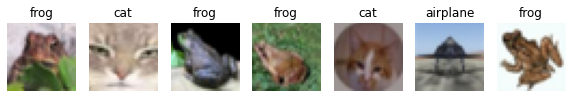

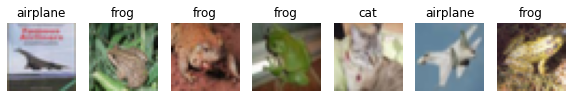

In [274]:
def display(data, labels, class_labels, display_n=5):
    columns = display_n
    rows = 1
    fig= plt.figure(figsize=(10, 10)) 
    for i in range(display_n): 
      i+=1
      fig.add_subplot(rows, columns, i)
      plt.imshow(data[i])
      plt.axis('off') 
      # Fixed issue with index calculation
      index=int(labels[i]/3)
      plt.title(class_labels[index]) 
    plt.show()

display(train_data, train_labels, class_labels, 7)
display(test_data, test_labels, class_labels, 7) 

In [5]:
# ~~~~~~~START TODO~~~~~~~~~
# (5 points): Split your training data into trian and val data.
# Take the first 20% of your data and move it into new arrays for val_data and val_labels
# Update your train_data and train_labels with the other 80% of data. 
data = train_data.copy()
n_data_samples = data.shape[0]
n_data_percentage = int(0.8*n_data_samples)

train_data = data[:n_data_percentage]
val_data = data[n_data_percentage:]

labels = train_labels.copy()
n_label_samples = labels.shape[0]
n_label_percentage = int(0.8*n_label_samples)

train_labels = labels[:n_label_percentage]
val_labels = labels[n_label_percentage:]
# ~~~~~~~~END TODO~~~~~~~~~~
print(val_labels.shape, train_labels.shape)
print(val_data.shape, train_data.shape)


(3000,) (12000,)
(3000, 32, 32, 3) (12000, 32, 32, 3)


Now that your train and test data are correctly loaded and pre-processed, you need to extract meaningful visual features from them. These features are going to drive machine leaarning-based image classifications tasks. Since such classifiers are trained and tested based on the features extracted, their design and quality (i.e., how well they represent/generalize the data) are paramount in the performance of the system.

In this assignment we are going to work with . Note that recent deep learning-based approaches also calculate similar features, but mostly using convolutional kernels in an efficient [1] manner.

You have been provided with the following feature extractor wrapper.  For this assignment you will be evaluating the performance of the HOG and SIFT implementations provide by `scikit-image` and raw RGB values.  For SIFT, we will only use the keypoint descriptor closest to the center of the (32,32) CIFAR images.

[1] Krizhevsky A, Sutskever I, Hinton GE. Imagenet classification with deep convolutional neural networks. Communications of the ACM. 2017 May 24;60(6):84-90.

In [6]:
def extract_hog_features(data):
  from skimage.feature import hog
  from skimage.color import rgb2gray
  # ~~~~~~~START TODO~~~~~~~~~
  # (2 points): Extract hog features for each image in the input array.
  # You should first use the rgb2gray fucntion above on each image to convert it to greyscale.
  # Then you should apply the hog function above, with dytype=np.foat32
  # You should reshape the output appropriately for the new hog features and data samples.
  data_hog = []
  for i in range(data.shape[0]):
    grayscale = rgb2gray(data[i])
    hog_image = hog(grayscale).astype(dtype=np.float32)
    data_hog.append(hog_image.reshape(-1))
    
  data_hog = np.array(data_hog)
  # ~~~~~~~~END TODO~~~~~~~~~~
  return data_hog

example_hog = extract_hog_features(val_data)
print(example_hog.shape)

(3000, 324)


We are going to test the efficacy of the three feature extraction method HOG by creating a Logistic Regresion Classifier (also know as maximum-entropy classification, log-linear classifier).
 
Note that we are working with a **classification** task: the independent variables (i.e., features) are going to determine the probability that a discrete value (class) happens. In the end, the dependent variable (output) can only assume a fixed number of values—the classes of the training data (for our datasets of 3 classes). Another common machine learning-based task is **regression**, where the independent variables result in a *continuous* value for the dependent variable (output). A common supervised machine learning algorithm used in such cases is the **linear regression**, where a line is fit to the data to map the values from the features to the predicted, continuous output. 

**Refer to lecture notes from class for details on logistic regression and loss optimization.**

Implement in `compute_loss` the multinomial logistic regression cross entropy loss for softmax from Lecture 13, with L2-norm regularization, which is defined as follows:

$L_i = -log(p_{y_i}) + \lambda R = -log\frac{e^{s_{y_i}}}{\sum_j e^{s_j}} + \lambda ||W||^2$

where i is the sample index. For numerical stability, add the term $C_i$,

$L_i = -log\frac{e^{{s_i}-C_i}}{\sum_j e^{s_{ij}-C_i}}+ \lambda ||W||^2$

where $C_i = max_j s_{ij}$ to ensure numerical stability.


You will also implement the loss optimization using cross entropy and softmax in `compute_grad`. 

In [7]:
def softmax(z):
    """Computes the softmax function."""
    #for numerical stabiliy, use C_ij
    e = np.exp(z - np.max(z, axis=1, keepdims=True))
    #calculate the softmax
    return e / np.sum(e, axis=1, keepdims=True)
  

In [313]:
def compute_loss(W, b, x, y, lmbda):
  # ~~~~~~~START TODO~~~~~~~~~    
  # (8 points): Computes cross entropy loss
  #W : (D, C), weight parameters
  #b : (C, ),  bias parameter
  #x : (B, D), x feature vector
  #y : (B, D), y label vector
  #D = dimension/length of the feature vector
  #C = number of classes
  #B = batch size
  #N = Number of samples in batch
  #Returns: loss, probs
  #For the `probs`, you want to probably save the “probabilities” for being each class for all samples, 
  #that is, the value that goes in the log. This, x, and y should be the only things 
  #that you need when you compute the gradient later on.
  # 1. Calculate scores for all classes (N, 3) from formula xW+b (3 classes one-hot encoded)                                                  
  # 2. Get the probabilities for the scores using the softmax function
  # 3. Calculate the negative log-liklyhood/cross entropy loss for all classes                     
  # 4. Average the loss over all classes     
  # 5. Add the L2-norm regularization term to the loss                     
  # 6. Return the average loss, probabilities
  # Source: https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e
  batch_size = min(x.shape)
  classes = min(W.shape)

  scores = np.dot(x, W)+b
  probs = softmax(scores)
  probs = probs.reshape(-1, classes)
  
  y = np.ceil((y/3)).astype('int32')
  y_flat = y.flatten()
  y_onehot = np.eye(classes)[y_flat]
  loss = -1/batch_size*np.sum(y_onehot*np.log(probs))+lmbda*np.linalg.norm(W)**2
  # ~~~~~~~~END TODO~~~~~~~~~~
  return loss, probs

np.random.seed(0)
def a_s(shape): return np.reshape(np.arange(0,np.prod(shape)),shape) 
def r_s(shape): return np.random.random(size=shape) 
# Note the shapes for this testing are not your expected shapes for the actual training
print('Spot Check this should be *NEARLY* exactly the expected values.')
print(compute_loss( r_s((100,5)), r_s((5,)), r_s((2,100)), a_s((2,)), 0.1))

Spot Check this should be *NEARLY* exactly the expected values.
(19.031250498223855, array([[0.18553095, 0.25893903, 0.02080741, 0.18226322, 0.3524594 ],
       [0.0048585 , 0.03987965, 0.00357538, 0.91750968, 0.03417679]]))


In [350]:
def compute_grad(W, x, y, probs, lmbda):
  """Computes the gradient for cross entropy loss."""
  # ~~~~~~~START TODO~~~~~~~~~    
  # (10 points): Computes logistic regression gradients to update weights
  # 1. Create one-hot encoding indexer `target`, for example [1] becomes [1,0,0,0,0] for 5 possible classes
  # 2. Calculate the derivative of the loss function w.r.t W (dW)
  # 3. Calculate the deriviative of the loss function w.r.t b (db)
  # 4. Add the gradient of the L2-norm regularization term to dW
  # TODO: Compute dW
  # TODO: Compute db
  batch_size = max(probs.shape)
  classes = min(probs.shape)

  target = np.eye(classes, batch_size)
  if probs.shape != target.shape:
    target = target.T 

  dL_dZ = probs-target
  dW = 1/classes*np.dot(x.T, dL_dZ) + 2*lmbda*W
  db = -1/classes*np.sum(dL_dZ, axis=0)
  # ~~~~~~~~END TODO~~~~~~~~~~
  return dW, db

np.random.seed(0)
def a_s(shape): return np.reshape(np.arange(0,np.prod(shape)),shape) 
def r_s(shape): return np.random.random(size=shape) 
# Note the shapes for this testing are not your expected shapes for the actual training
print('Spot Check this should be *NEARLY* exactly the expected values.')
print(compute_grad( r_s((100,5)), r_s((2,100)), a_s((2,)), r_s((2,5)),  0.1)[0][0])
print(compute_grad( r_s((100,5)), r_s((2,100)), a_s((2,)), r_s((2,5)),  0.1)[1][0])

Spot Check this should be *NEARLY* exactly the expected values.
[0.02122597 0.11344071 0.13882725 0.12794529 0.19386747]
0.36986607373914293


In [80]:
def predict(x, W, b):
    """ get the current model (W,b) label predictions of data x """
    s_all = np.matmul(x, W) + b
    pred = np.argmax(s_all, axis=1)
    return pred

def generate_batches(x,y,batch_size):
    #Randomize the data order for each batch
    idx = np.arange(len(y))
    np.random.shuffle(idx)
    x_ = x[idx]
    y_ = y[idx]
    n_batches = len(y) // batch_size

    assert x_.shape == x.shape

    x_ = np.reshape(x_, (n_batches, batch_size, -1))
    y_ = np.reshape(y_, (n_batches, batch_size))

    return x_, y_

In [347]:
def train(tr_x, tr_y, va_x, va_y, class_labels, train_params):
    """Training function.
      Parameters
      ----------
      tr_x : ndarray, train data.

      tr_y : ndarray, train labels.

      te_x : ndarray, test data.

      te_y : ndarray, test labels.

      train_params: dict, training hyperparameters

      Returns: 
            dictionary of train results      
    """

    print("Testing...")
    batch_size = train_params["batch_size"]
    num_epochs = train_params["num_epochs"]
    learning_rate = train_params["learning_rate"]
    lmbda = train_params["lambda"]
  
    num_classes = len(class_labels)
    D = tr_x.shape[-1] 
    
    # ~~~~~~~START TODO~~~~~~~~~    
    # (25 points for entire block all TODOs):
    # 1. Initialize W to very small random values. e.g. random values between
    # -0.001 and 0.001
    # 2. Initialize b to zeros
    # 3. For each epoch
    #    a. Report average (3072, 10) (10,) (32, 3072) (32, 3072)training and prediction accuracy results
    #    b. Calculate the prediction accuracy of the current model on the test
    #         data set
    #    c. If we have achieved a better validation accuracy than before, save 
    #       the current W and b
    #    d. Plot the average loss, validation and training accuracies
    num_batch = int(tr_x.shape[0]/batch_size)
    W = np.random.uniform(low=-0.001, high=0.001, size=(D, num_classes))
    b = np.zeros(num_classes)

    W_best = W.copy()
    b_best = b.copy()
    # ~~~~~~~~END TODO~~~~~~~~~~

    #print("Initial Validation Accuracy: {}%".format(acc * 100))

    for idx_epoch in range(num_epochs):
      losses = np.zeros(num_batch)
      accs = np.zeros(num_batch)
      # ~~~~~~~START TODO~~~~~~~~~    
      # 4. Create a random order to go through the data using generate_batches
      x, y = generate_batches(tr_x, tr_y, batch_size)
      for idx_batch in range(num_batch):
        # ~~~~~~~CONTINUE TODO~~~~~~~~
        # 5. For each training batch:
        #    a. construct a batch of of the training data
        #    - NOTE: ensure that your labels/data pairings are correct
        #    b. Get cross entropy loss with compute_loss
        #    c. Get gradient with compute_grad
        #    d. Update the parametres, W, b using the gradients
                # W = W - lr * dW 
                # b = b - lr * db 
        #    3. Save the current train loss and prediction accuracy 
        idx_start = idx_batch*batch_size 
        idx_end = idx_start+batch_size 
        x_batch = x[idx_start:idx_end]
        y_batch = y[idx_start:idx_end]
        loss, probs = compute_loss(W, b, x_batch, y_batch, lmbda)
        dW, db = compute_grad(W, x_batch, y_batch, probs, lmbda)
        prediction = predict(x_batch, W, b)

        W -= learning_rate*dW 
        b -= learning_rate*db

        losses[idx_epoch] = loss 
        accs[idx_epoch] = prediction
        # ~~~~~~~~END TODO~~~~~~~~~~

    # ~~~~~~~START TODO~~~~~~~~~    
    # Predict on validation data and gnerate predictions and accuracy.
    # If best validation accuracy, update W_best, b_best, and best
    # accuracy. We will only return the best W and b
    acc_val = predict(te_x, W, b)
    if acc_val > np.argmax(accs):
      W_best = W
      b_best = b 
      acc = acc_val
    # ~~~~~~~~END TODO~~~~~~~~~~
        
    if idx_epoch % 5 == 0:    
      # Report average results within this epoch
      print("Epoch {} -- Train Loss: {}".format(
          idx_epoch, np.mean(losses)))
      print("Epoch {} -- Train Accuracy: {:.2f}%".format(
          idx_epoch, np.mean(accs) * 100))
      print("Epoch {} -- Validation Accuracy: {:.2f}%".format(
        idx_epoch, acc * 100))

    loss_epoch += [np.mean(losses)]
    tr_acc_epoch += [np.mean(accs)]
    va_acc_epoch += [acc]

    # Pack results. 
    train_res = {}
    train_res["W"] = W_best
    train_res["b"] = b_best
    train_res["loss"] = loss_epoch
    train_res["tr_acc"] = tr_acc_epoch
    train_res["va_acc"] = va_acc_epoch

    return train_res

In [351]:
def normalize(data, data_mean=None, data_range=None):
    data_f = data.astype(float)
    # Make zero mean
    if data_mean is None:
        data_mean = np.mean(data_f, axis=0, keepdims=True)
    data_n = data_f - data_mean
    # Make range -1 and 1
    if data_range is None:
        data_range = np.max(np.abs(data_n), axis=0, keepdims=True)
    data_n = data_n / data_range
    #Return the normalized data, the pre-normalized data mean, and data range
    return data_n, data_mean, data_range

#Default training parameters for logistic regression
train_params = {
  'batch_size' : 100,
  'num_epochs' : 200,
  'learning_rate' : 1e-4,
  'lambda' : 1.0,
}

print(f"Training parameters: {train_params}")

all_results = {}
norm = {}

#1. Extract features for the train and test dataset
#2. Normalize feature vectors using the normalize function.
#3. Run the training function
tr_x = extract_hog_features(train_data)
va_x = extract_hog_features(val_data)

print(f"Training data before: mean {tr_x.mean()}, std {tr_x.std()}, min {tr_x.min()}, max {tr_x.max()}")

tr_x, tr_mean, tr_range = normalize(tr_x) 
va_x, _, _ = normalize(va_x, tr_mean, tr_range)

norm['hog'] = [tr_mean, tr_range]

print(f"Training data after: mean {tr_x.mean()}, std {tr_x.std()}, min {tr_x.min()}, max {tr_x.max()}")
print(f"Test data after: mean {va_x.mean()}, std {va_x.std()}, min {va_x.min()}, max {va_x.max()}")

assert tr_x.min() >= -1 and tr_x.max() <= 1.0, f"Train data should be normalized to [-1, 1]: {tr_x.min()}, {tr_x.max()}"

#hog: (N, 324)
train_res = train(tr_x, train_labels, va_x, val_labels, class_labels, train_params)
all_results['hog'] = train_res

print("All done training!")

Training parameters: {'batch_size': 100, 'num_epochs': 200, 'learning_rate': 0.0001, 'lambda': 1.0}
Training data before: mean 0.08396731317043304, std 0.07276792079210281, min 0.0, max 0.5034471750259399
Training data after: mean 1.5168479184179093e-18, std 0.23931653912739112, min -0.44610811892399527, max 1.0
Test data after: mean -0.0010045814909442207, std 0.23974573069003602, min -0.44610811892399527, max 1.4409047275845441
Testing...


ValueError: ignored

In [329]:
from sklearn.metrics import confusion_matrix
def evaluate(X, y, train_res):
    """For the model, calculate the:
        - Recall (per class)
        - Precision (per class)
        - Average Recall, 
        - Average Precision,
        - Average F1 score
        - Average Accuracy 

    Parameters
    ----------
    X : ndarray NxD array where N is the number of instances and D and the number of features 
    y : narray Nx1 array with a label for each instance 
    train_res : training dict containing best W,b

    Returns
        results : dictionary 
    -------
    
    """
    EPS=1e-6
    results = {"accuracy" : 0,
               "recall" : 0,
               "precision" : 0,
               "avg_recall" : 0,
               "avg_precision" : 0,
               "fscore" : 0}

    print("Use our trained model to predict h: X -> [0,3]");
    #Predict the class by getting the class label (ie index) with the max probability 
    pred = pred = predict(X, train_res["W"], train_res["b"])

    print("Creating confusion matrix and calculating evaluation metrics");
    #Calculate the confusion matrix, and normalize it between 0-1
    cm = confusion_matrix(y,pred).astype(np.float32)

    #From the confusion matrix, calculate precision/recall/f1-measure
    results['recall'] = np.diag(cm) / (np.sum(cm, axis=1) + EPS)
    results['avg_recall'] = np.mean(results['recall'])

    results['precision'] = np.diag(cm) / (np.sum(cm, axis=0) + EPS)
    results['avg_precision'] = np.mean(results['precision'])

    results["fscore"] = 2 * ( results['avg_precision'] * results['avg_recall'] ) / (results['avg_precision'] + results['avg_recall'] + EPS)

    results["accuracy"] = np.mean(pred == y)

    return results



te_x = extract_hog_features(test_data)
te_x, _, _ = normalize(te_x, *norm['hog']) 
print(f"Test data after: mean {te_x.mean()}, std {te_x.std()}, min {te_x.min()}, max {te_x.max()}")
#plot(all_results[feat_type], feat_type)
results = evaluate(te_x, test_labels, all_results['hog'])
for key in results.keys():
  print(key, results[key])

Test data after: mean -0.00012972148015294005, std 0.23936652450862886, min -0.44610811892399527, max 1.2673874888157646


KeyError: ignored

**End of the assignment!**